Import pandas, matplotlib, and all other necessary packages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import glob
import os

Read in all data from csv files and print a sample of the imports

In [2]:
data = pd.concat(map(pd.read_csv,["customers_export_1.csv", "customers_export_2.csv", 
 "customers_export_3.csv","customers_export_4.csv", "customers_export_5.csv","customers_export_6.csv",
 "customers_export_7.csv", "customers_export_8.csv", "customers_export_9.csv", "customers_export_10.csv",
 "customers_export_11.csv", "customers_export_12.csv", "customers_export_13.csv", "customers_export_14.csv",
 "customers_export_15.csv", "customers_export_16.csv", "customers_export_17.csv", "customers_export_18.csv",
 "customers_export_19.csv", "customers_export_20.csv", "customers_export_21.csv", "customers_export_22.csv",
 "customers_export_23.csv", "customers_export_24.csv", "customers_export_25.csv", "customers_export_26.csv",
 "customers_export_27.csv", "customers_export_28.csv", "customers_export_29.csv", "customers_export_30.csv",
 "customers_export_31.csv", "customers_export_32.csv", "customers_export_33.csv", "customers_export_34.csv",
 "customers_export_35.csv", "customers_export_36.csv", "customers_export_37.csv", "customers_export_38.csv",
 "customers_export_39.csv", "customers_export_40.csv", "customers_export_41.csv", "customers_export_42.csv",
 "customers_export_43.csv", "customers_export_44.csv", "customers_export_45.csv", "customers_export_46.csv",
 "customers_export_47.csv", "customers_export_48.csv", "customers_export_49.csv", "customers_export_50.csv",
 "customers_export_51.csv", "customers_export_52.csv", "customers_export_53.csv", "customers_export_54.csv",
 "customers_export_55.csv", "customers_export_56.csv", "customers_export_57.csv", "customers_export_58.csv",
 "customers_export_59.csv", "customers_export_60.csv", "customers_export_61.csv", "customers_export_62.csv",
 "customers_export_63.csv", "customers_export_64.csv", "customers_export_65.csv", "customers_export_66.csv",
 "customers_export_67.csv", "customers_export_68.csv", "customers_export_69.csv", "customers_export_70.csv",
 "customers_export_71.csv", "customers_export_72.csv", "customers_export_73.csv", "customers_export_74.csv",
 "customers_export_75.csv", "customers_export_76.csv", "customers_export_77.csv", "customers_export_78.csv",
 "customers_export_79.csv", "customers_export_80.csv", "customers_export_82.csv",
 "customers_sales.csv", "customer_analytics_8-18-2022.csv"]))

#print(data.shape)
#data.info(memory_usage='deep')

<ipython-input-2-cfaf19f9551d>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat(map(pd.read_csv,["customers_export_1.csv", "customers_export_2.csv",
<ipython-input-2-cfaf19f9551d>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat(map(pd.read_csv,["customers_export_1.csv", "customers_export_2.csv",
<ipython-input-2-cfaf19f9551d>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat(map(pd.read_csv,["customers_export_1.csv", "customers_export_2.csv",
<ipython-input-2-cfaf19f9551d>:1: DtypeWarning: Columns (1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat(map(pd.read_csv,["customers_export_1.csv", "customers_export_2.csv",
<ipython-input-2-cfaf19f9551d>:1: DtypeWarning: Columns (1,12) have mixed types. Specify dtype option on i

In [3]:
data.sample(5)

,First Name,Last Name,Email,Accepts Email Marketing,Company,Address1,Address2,City,Province,Province Code,...,Total Spent,Total Orders,Tags,Tax Exempt,Note,Accepts Marketing,Last Name,Unnamed: 5,Full Name,Orders
26894,Amy,Myers,ajmyers566@gmail.com,NaN,NaN,361 Countryside Dr,NaN,Broadview Heights,Ohio,OH,...,36.29,1.0,Receiving updates in Messenger,no,NaN,no,NaN,NaN,NaN,NaN
17173,Parker,Hatfield,parkerthatfield@students.wawasee.k12.in.us,NaN,NaN,12299 N Kern Rd,NaN,Syracuse,Indiana,IN,...,36.48,1.0,NaN,no,NaN,yes,NaN,NaN,NaN,NaN
15050,Tiana,Hull,tianahull98@yahoo.com,NaN,NaN,103 Amherst Ct,NaN,Kyle,Texas,TX,...,38.98,1.0,NaN,no,NaN,yes,NaN,NaN,NaN,NaN
17111,Ines,Kladnjakovic,xledenax@live.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,NaN,no,NaN,yes,NaN,NaN,NaN,NaN
2495,Debbie,Benjamin,dlbenjamin2010@gmail.com,NaN,NaN,86 Lockwood Road,NaN,Riverside,Connecticut,CT,...,84.39,2.0,NaN,no,NaN,yes,NaN,NaN,NaN,NaN


Create a list and corresponding bar chart that contains only the provinces with a customer count greater than 5000

In [4]:
province_dict = dict()

for row in data.dropna(subset = 'Province')['Province']:
    if row not in province_dict:
        province_dict[row] = 1
    else:
        province_dict[row] = province_dict[row] + 1

In [5]:
cut_prov_dict = province_dict
count = 0
keys_list = list(cut_prov_dict)

while count < len(keys_list):
    key = keys_list[count]
    if cut_prov_dict[key] < 5000: #minimum customer count per province 
        cut_prov_dict.pop(key)
    count += 1
    
cut_prov_dict = dict(sorted(cut_prov_dict.items(), key=lambda x: x[1], reverse = True))

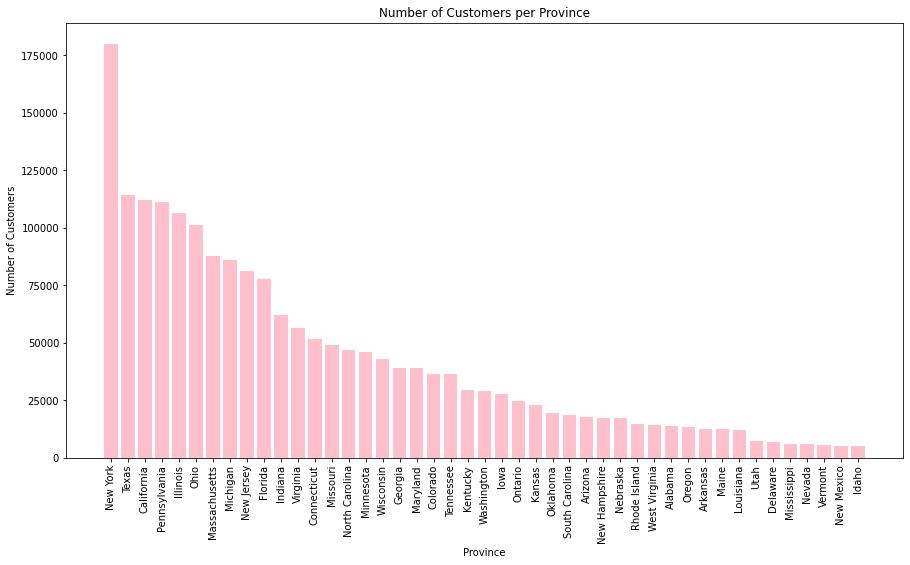

In [6]:
province = list(cut_prov_dict.keys())
customer_count = list(cut_prov_dict.values())

plt.figure(figsize = (15, 8))
plt.bar(province, customer_count, color = 'pink')
plt.title("Number of Customers per Province")
plt.xlabel("Province")
plt.ylabel("Number of Customers")
plt.xticks(rotation = 90)
plt.show()

Create a list and corresponding bar chart that contains only the cities with a customer count greater than 3500

In [26]:
city_dict = dict()

for row in data.dropna(subset = 'City')['City']:
    if row not in city_dict:
        city_dict[row] = 1
    else:
        city_dict[row] = city_dict[row] + 1

In [27]:
cut_city_dict = city_dict
count = 0
keys_list = list(cut_city_dict)

while count < len(keys_list):
    key = keys_list[count]
    if cut_city_dict[key] < 3500: #minimum customer count per province 
        cut_city_dict.pop(key)
    count += 1
    
cut_city_dict = dict(sorted(cut_city_dict.items(), key=lambda x: x[1], reverse = True))

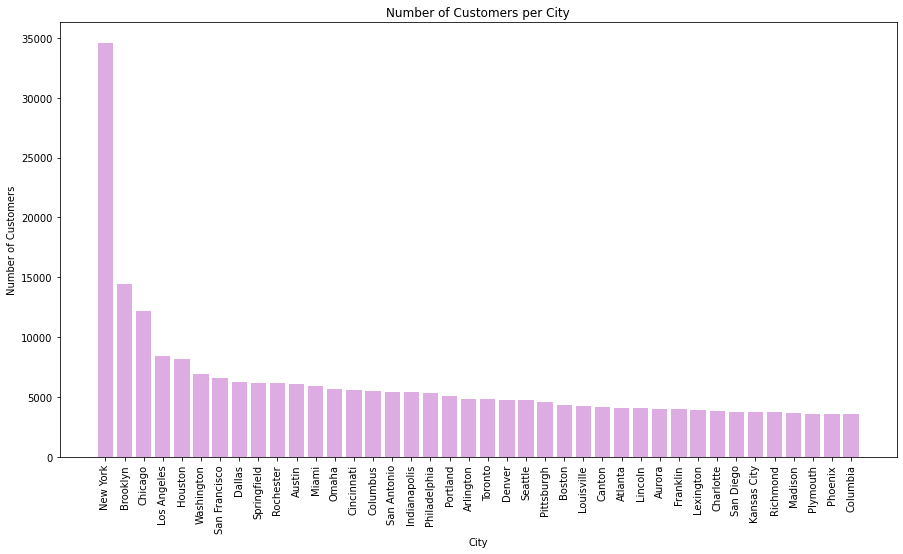

In [33]:
city = list(cut_city_dict.keys())
customer_count = list(cut_city_dict.values())

plt.figure(figsize = (15, 8))
plt.bar(city, customer_count, color = '#ddace3')
plt.title("Number of Customers per City")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation = 90)
plt.show()

Create a list and corresponding pie chart that shows the distribution of all customers' total spending

In [7]:
spent_list = data['Total Spent'].tolist()
spent_dict = {'< $25':0, '< $50':0, '< $75':0, '< $100':0, '< $200':0, '< $300':0, '< $400':0, '> $400':0}

for total in spent_list:
    if total != 0.0:
        if total < 25.0:
            spent_dict['< $25'] = spent_dict['< $25'] + 1
        elif total < 50.0:
            spent_dict['< $50'] = spent_dict['< $50'] + 1
        elif total < 75.0:
            spent_dict['< $75'] = spent_dict['< $75'] + 1
        elif total < 100.0:
            spent_dict['< $100'] = spent_dict['< $100'] + 1
        elif total < 200.0:
            spent_dict['< $200'] = spent_dict['< $200'] + 1
        elif total < 300.0:
            spent_dict['< $300'] = spent_dict['< $300'] + 1
        elif total < 400.0:
            spent_dict['< $400'] = spent_dict['< $400'] + 1
        elif total > 400.0:
            spent_dict['> $400'] = spent_dict['> $400'] + 1

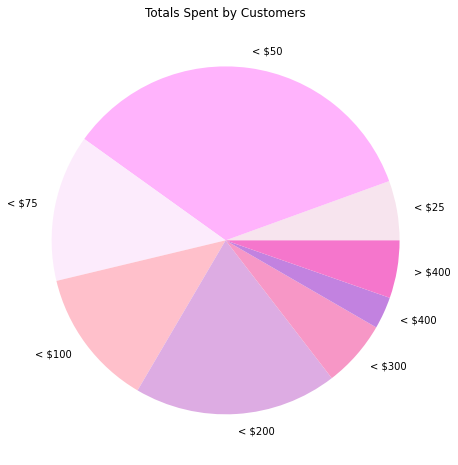

In [8]:
total_spent = list(spent_dict.keys())
customer_count = list(spent_dict.values())

colors = ['#f7e4ee','#ffb3fc','#fcebfc', 'pink','#ddace3', '#f797c6', '#c282e0','#f576cc','pink']
plt.figure(figsize = (8, 8))
plt.pie(customer_count, labels= total_spent, colors = colors)
plt.title("Totals Spent by Customers")
plt.show()

Create a list and corresponding bar chart that shows the distribution of the amount of orders all customers placed

In [9]:
orders_dict = dict()

for row in data['Total Orders']:
    if row != 0:
        if row not in orders_dict:
            orders_dict[row] = 1
        else:
            orders_dict[row] = orders_dict[row] + 1
            
orders_dict = collections.OrderedDict(sorted(orders_dict.items()))

In [10]:
cut_dict = orders_dict
count = 0
keys_list = list(cut_dict)

while count < len(keys_list):
    key = keys_list[count]
    if cut_dict[key] < 50000: #minimum frequncy of customers who have placed a specific number of orders
        cut_dict.pop(key)
    count += 1

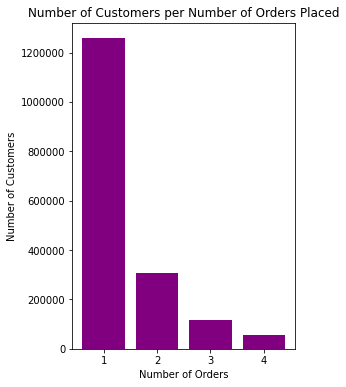

In [11]:
total_orders = list(orders_dict.keys())
orders_count = list(orders_dict.values())

plt.figure(figsize = (4,6))
plt.bar(total_orders, orders_count, color = 'purple')
plt.ticklabel_format(style='plain')
plt.title("Number of Customers per Number of Orders Placed")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

Create a new data frame that contains only the customers' province and their corresponding total spent. Then print a sample from the new data frame

In [12]:
totalData = pd.DataFrame() 
totalData['Province'] = data['Province']
totalData['Total Spent'] = data['Total Spent']

totalData = totalData.dropna()
totalData.sample(5)

,Province,Total Spent
2773,Colorado,43.49
18528,North Carolina,18.49
37598,Virginia,39.48
380,Quebec,0.00
24421,Colorado,75.49


Create a list and corresponding bar chart that shows the average total spent per customer per province. This is to show which province's customers spend the most 

In [13]:
sum_dict = dict()
count_dict = dict()
i = 0

for row in totalData['Province']:
    if totalData.iloc[i, 1] != 0 and i < len(data):
        if row not in sum_dict:
            sum_dict[row] = totalData.iloc[i, 1]
            count_dict[row] = 1
        else:
            sum_dict[row] = sum_dict[row] + totalData.iloc[i, 1]
            count_dict[row] = count_dict[row] + 1
    i += 1

In [14]:
temp_count = dict()
temp_sum = dict()

for province in count_dict:
    if count_dict[province] >= 10000: #minimum number of orders per province 
        temp_count[province] = count_dict[province]
        temp_sum[province] = sum_dict[province]

count_dict = temp_count
sum_dict = temp_sum

In [15]:
avg_dict = dict()
i = 0

for province in sum_dict:
        avg_dict[province] = sum_dict[province] / count_dict[province]
        
avg_dict = dict(sorted(avg_dict.items(), key=lambda x: x[1], reverse = True))

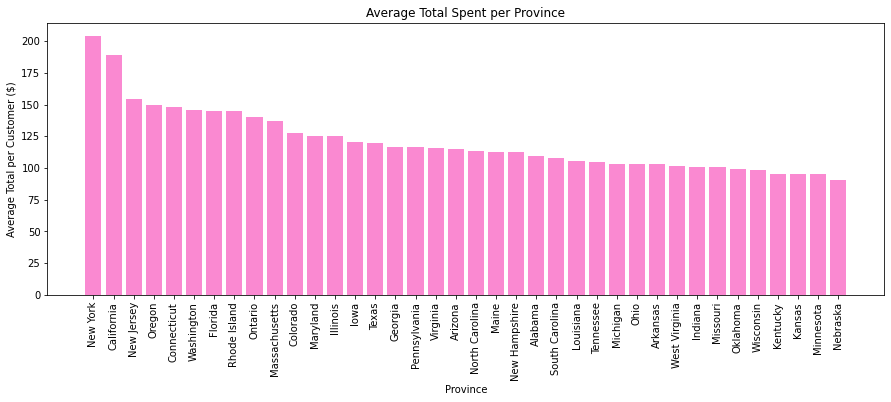

In [16]:
provinces = list(avg_dict.keys())
avg_spent = list(avg_dict.values())

plt.figure(figsize = (15,5))
plt.bar(provinces, avg_spent, color = '#fa89d1')
plt.xticks(rotation = 90)
plt.title("Average Total Spent per Province")
plt.xlabel("Province")
plt.ylabel("Average Total per Customer ($)")
plt.show()